<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

I decided to work with data regarding the air qulity in New York City from Data.gov. I choose to work with this data because air pollution is one of the most important environmental threats to urban populations and while all people are exposed, pollutant emissions, levels of exposure, and population vulnerability vary across neighborhoods. Exposures to common air pollutants have been linked to respiratory and cardiovascular diseases, cancers, and premature deaths. These indicators provide a perspective across time and NYC geographies to better characterize air quality and health in NYC. 

The data can be downloded at this site: https://catalog.data.gov/dataset/air-quality

In [418]:
# air_quality: https://catalog.data.gov/dataset/air-quality
air_quality_df = pd.read_csv("/Users/dirkhartog/desktop/Data_sets/Air_Quality.csv")

In [419]:
air_quality_df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [420]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


______________
# Data Exploration
*Import your dataset into your .ipynb, create dataframes, and explore your data.* 

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [421]:
# Look for any missing values in each column 

air_quality_df.isna().any()

Unique ID         False
Indicator ID      False
Name              False
Measure           False
Measure Info      False
Geo Type Name     False
Geo Join ID       False
Geo Place Name    False
Time Period       False
Start_Date        False
Data Value        False
Message            True
dtype: bool

In [422]:
# Look for any duplicate rows in the df

air_quality_df.duplicated().any()

False

#### *We can also look at the unique items in columns that we may look at in our visualizations*

In [423]:
# Unique time periods in the data

print(f'The number of unique time periods present in the date: {air_quality_df["Time Period"].nunique()} \n')

print(pd.Series(air_quality_df["Time Period"].unique()).sort_values().reset_index(drop = True))

The number of unique time periods present in the date: 50 

0     2-Year Summer Average 2009-2010
1                                2005
2                           2005-2007
3                           2009-2011
4                                2011
5                           2012-2014
6                                2013
7                                2014
8                                2015
9                           2015-2017
10                               2016
11                Annual Average 2009
12                Annual Average 2010
13                Annual Average 2011
14                Annual Average 2012
15                Annual Average 2013
16                Annual Average 2014
17                Annual Average 2015
18                Annual Average 2016
19                Annual Average 2017
20                Annual Average 2018
21                Annual Average 2019
22                Annual Average 2020
23                Annual Average 2021
24                        Su

In [12]:
# Unique measurement categories

print(f'The number of unique measurements collected: {air_quality_df["Name"].nunique()}\n')

print(pd.Series(air_quality_df["Name"].unique()).sort_values().reset_index(drop = True))

The number of unique measurements collected: 18

0                         Annual vehicle miles traveled
1                 Annual vehicle miles travelled (cars)
2               Annual vehicle miles travelled (trucks)
3       Asthma emergency department visits due to PM2.5
4      Asthma emergency departments visits due to Ozone
5                  Asthma hospitalizations due to Ozone
6                 Boiler Emissions- Total NOx Emissions
7               Boiler Emissions- Total PM2.5 Emissions
8                 Boiler Emissions- Total SO2 Emissions
9           Cardiac and respiratory deaths due to Ozone
10    Cardiovascular hospitalizations due to PM2.5 (...
11                                  Deaths due to PM2.5
12                              Fine particles (PM 2.5)
13                               Nitrogen dioxide (NO2)
14                         Outdoor Air Toxics - Benzene
15                    Outdoor Air Toxics - Formaldehyde
16                                           Ozone (O3)

In [424]:
# Unique Geo Place Name 

print(f'The number of unique locations where data was collected: {air_quality_df["Geo Place Name"].nunique()}\n')

print(pd.Series(air_quality_df["Geo Place Name"].unique()).sort_values().reset_index(drop = True))

The number of unique locations where data was collected: 114

0        Bay Ridge and Dyker Heights (CD10)
1                     Bayside - Little Neck
2         Bayside Little Neck-Fresh Meadows
3            Bayside and Little Neck (CD11)
4                  Bedford Stuyvesant (CD3)
                       ...                 
109                             West Queens
110    Williamsbridge and Baychester (CD12)
111                 Williamsburg - Bushwick
112                             Willowbrook
113            Woodside and Sunnyside (CD2)
Length: 114, dtype: object


# Data Wrangling

*Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.*

In [425]:
# Drop columns that we dont need that appear to have duplicate information besideds "Unique ID"

air_quality_df.drop(columns = ["Unique ID", "Indicator ID", "Message", "Geo Join ID", "Geo Type Name"], inplace = True)

In [ ]:
#Change column names to upper and add an underscore 

air_quality_df.columns = air_quality_df.columns.str.upper()
air_quality_df.columns = air_quality_df.columns.str.replace(" ", "_")

In [426]:
# Change all values to upper case 

for col in air_quality_df: 
    air_quality_df[col] =  air_quality_df[col].astype("str")
    air_quality_df[col] =  air_quality_df[col].str.upper()

In [427]:
air_quality_df["DATA_VALUE"] = air_quality_df["DATA_VALUE"].astype("float")
air_quality_df["START_DATE"] = pd.to_datetime(air_quality_df["START_DATE"])

In [428]:
air_quality_df.head()

,NAME,MEASURE,MEASURE_INFO,GEO_PLACE_NAME,TIME_PERIOD,START_DATE,DATA_VALUE
0,NITROGEN DIOXIDE (NO2),MEAN,PPB,BEDFORD STUYVESANT - CROWN HEIGHTS,ANNUAL AVERAGE 2011,2010-12-01,25.30
1,NITROGEN DIOXIDE (NO2),MEAN,PPB,BEDFORD STUYVESANT - CROWN HEIGHTS,ANNUAL AVERAGE 2009,2008-12-01,26.93
2,NITROGEN DIOXIDE (NO2),MEAN,PPB,EAST NEW YORK,ANNUAL AVERAGE 2015,2015-01-01,19.09
3,NITROGEN DIOXIDE (NO2),MEAN,PPB,FORDHAM - BRONX PK,ANNUAL AVERAGE 2015,2015-01-01,19.76
4,NITROGEN DIOXIDE (NO2),MEAN,PPB,PELHAM - THROGS NECK,ANNUAL AVERAGE 2009,2008-12-01,22.83


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
*Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:*

*Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.* 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **FIRST PLOT - MATPLOTLIB**

For the first plot we will look at the trends in the concentration of gases in the air duing the time periods below
- Winter
- Summer
- Annual Average

In [429]:
# Original data set will be filtered to pull out those time periods 

air_quality_seasons = air_quality_df.copy()
air_quality_seasons = air_quality_seasons[air_quality_seasons["TIME_PERIOD"].str.startswith(("WINTER", "SUMMER", "ANNUAL"))]
air_quality_seasons.drop_duplicates(keep = "first", inplace = True)

# Tidy seasons columns and create two new columns year 
season = []
year = []

import regex as re
for period in air_quality_seasons["TIME_PERIOD"]:
    yr = re.findall(r'\d{4}', period)
    year.append(yr[0])
    
    period = re.findall(r'[A-Z]+', period)
    if len(period) > 1: 
        season.append(" ".join(period))
    else: 
        season.append(period[0])

air_quality_seasons["PERIOD"] = season
air_quality_seasons["YEAR"] = year


In [430]:
air_quality_seasons.head()

,NAME,MEASURE,MEASURE_INFO,GEO_PLACE_NAME,TIME_PERIOD,START_DATE,DATA_VALUE,PERIOD,YEAR
0,NITROGEN DIOXIDE (NO2),MEAN,PPB,BEDFORD STUYVESANT - CROWN HEIGHTS,ANNUAL AVERAGE 2011,2010-12-01,25.30,ANNUAL AVERAGE,2011
1,NITROGEN DIOXIDE (NO2),MEAN,PPB,BEDFORD STUYVESANT - CROWN HEIGHTS,ANNUAL AVERAGE 2009,2008-12-01,26.93,ANNUAL AVERAGE,2009
2,NITROGEN DIOXIDE (NO2),MEAN,PPB,EAST NEW YORK,ANNUAL AVERAGE 2015,2015-01-01,19.09,ANNUAL AVERAGE,2015
3,NITROGEN DIOXIDE (NO2),MEAN,PPB,FORDHAM - BRONX PK,ANNUAL AVERAGE 2015,2015-01-01,19.76,ANNUAL AVERAGE,2015
4,NITROGEN DIOXIDE (NO2),MEAN,PPB,PELHAM - THROGS NECK,ANNUAL AVERAGE 2009,2008-12-01,22.83,ANNUAL AVERAGE,2009


In [431]:
# Lets look at the unique gases that were measured in the time periods Winter, Summer, Annual Average

for gas in air_quality_seasons["NAME"].unique():
    print(gas)

NITROGEN DIOXIDE (NO2)
FINE PARTICLES (PM 2.5)
OZONE (O3)


In [432]:
# There are 144 locations in this data set, I was curious about the measurement of gases in my Neighborhod (Upper West Side).

# First we will look at the trends in the annual average measurement for all three gases in teh Upper West Side

# NITROGEN DIOXIDE 
uws_annual_average_NO2 = air_quality_seasons[air_quality_seasons ["PERIOD"].str.startswith("ANNUAL") & 
                           (air_quality_seasons ["NAME"] == "NITROGEN DIOXIDE (NO2)") &
                          (air_quality_seasons ["GEO_PLACE_NAME"] == "UPPER WEST SIDE")].sort_values("YEAR", ascending = True)

uws_winter_NO2 = air_quality_seasons[(air_quality_seasons ["PERIOD"].str.startswith("WINTER")) & 
                           (air_quality_seasons ["NAME"] == "NITROGEN DIOXIDE (NO2)") &
                          (air_quality_seasons ["GEO_PLACE_NAME"] == "UPPER WEST SIDE")].sort_values("YEAR", ascending = True)

uws_summer_NO2 = air_quality_seasons[(air_quality_seasons ["PERIOD"].str.startswith("SUMMER")) & 
                           (air_quality_seasons ["NAME"] == "NITROGEN DIOXIDE (NO2)") &
                          (air_quality_seasons ["GEO_PLACE_NAME"] == "UPPER WEST SIDE")].sort_values("YEAR", ascending = True)

# FINE PARTICLES                          
uws_annual_average_PM = air_quality_seasons[air_quality_seasons["PERIOD"].str.startswith("ANNUAL") & 
                   (air_quality_seasons["NAME"] == "FINE PARTICLES (PM 2.5)") &
                   (air_quality_seasons ["GEO_PLACE_NAME"] == "UPPER WEST SIDE")].sort_values("YEAR", ascending = True)

uws_winter_PM = air_quality_seasons[air_quality_seasons["PERIOD"].str.startswith("WINTER") & 
                   (air_quality_seasons["NAME"] == "FINE PARTICLES (PM 2.5)") &
                   (air_quality_seasons ["GEO_PLACE_NAME"] == "UPPER WEST SIDE")].sort_values("YEAR", ascending = True)

uws_summer_PM = air_quality_seasons[air_quality_seasons["PERIOD"].str.startswith("SUMMER") & 
                   (air_quality_seasons["NAME"] == "FINE PARTICLES (PM 2.5)") &
                   (air_quality_seasons ["GEO_PLACE_NAME"] == "UPPER WEST SIDE")].sort_values("YEAR", ascending = True)


# OZONE 
uws_summer_O3 = air_quality_seasons[air_quality_seasons["PERIOD"].str.startswith("SUMMER") & 
                   (air_quality_seasons["NAME"] == "OZONE (O3)") &
                   (air_quality_seasons ["GEO_PLACE_NAME"] == "UPPER WEST SIDE")].sort_values("YEAR", ascending = True)



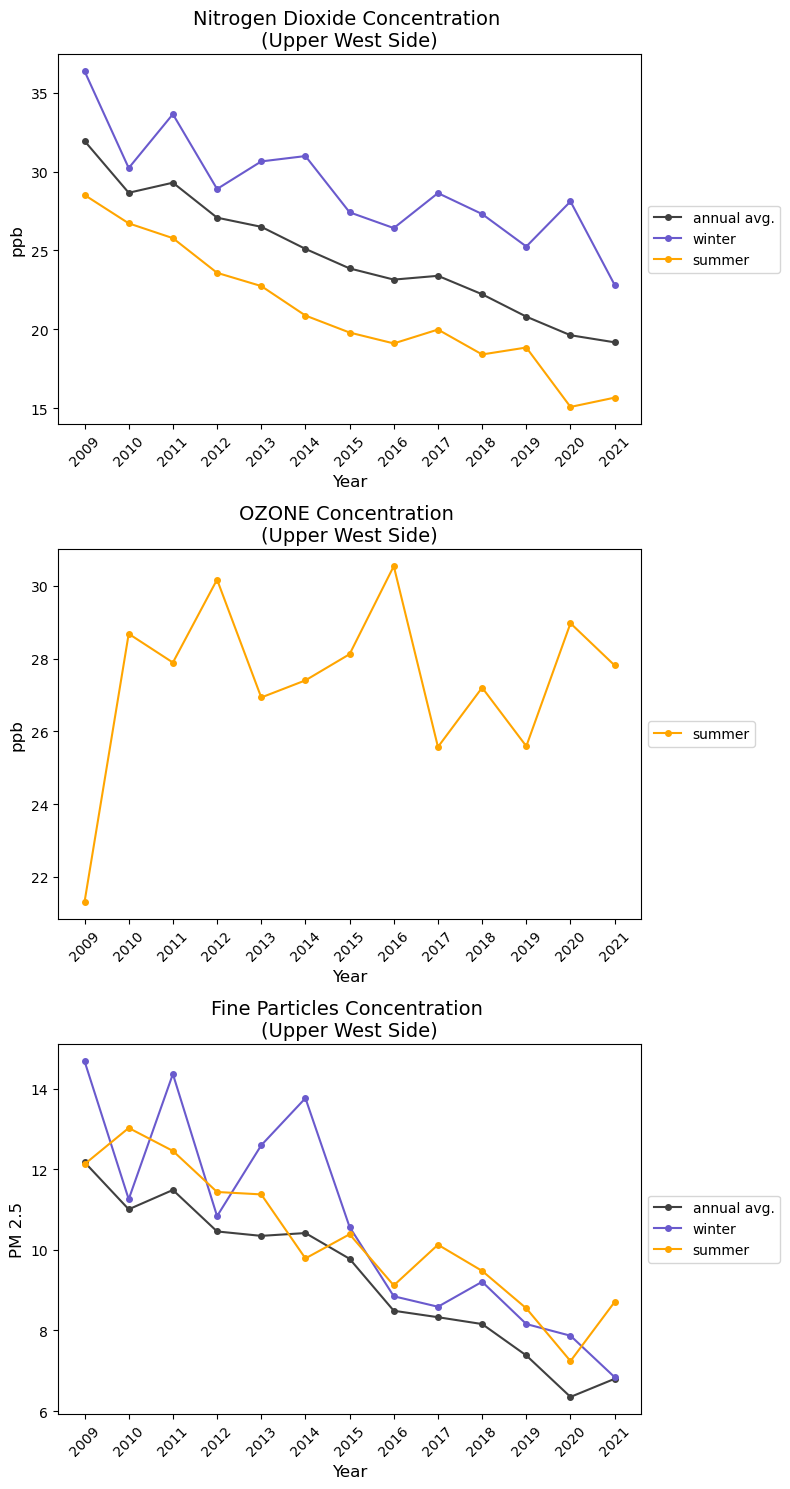

In [433]:
#year_labels = list(pd.date_range("01-01-2009", "01-01-2022", freq = "A").year)

plt.figure(figsize=(8,15))

# Create subplot each plot will disply the individual trends for each gas/particle
# In this subplot: 
# - Color of the line representing the time period was changed
# - Labels of the legend was chagned 
# - Font size was changed for x an y axis and title
# - Legend was placed outside the plot
# - Tight layout was used to adjust the padding between and aroudn subplots

# First subplot - Trends in Nitrogen Oxide 

plt.subplot(3,1,1)
plt.plot(uws_annual_average_NO2["YEAR"], uws_annual_average_NO2["DATA_VALUE"], 
         marker = "o",markersize = 4, color = "#404040", label = "annual avg.")

plt.plot(uws_annual_average_NO2["YEAR"], uws_winter_NO2["DATA_VALUE"], 
         marker = "o", markersize = 4, color = "#6a5acd", label = "winter")

plt.plot(uws_annual_average_NO2["YEAR"], uws_summer_NO2["DATA_VALUE"], 
         marker = "o",markersize = 4, color = "#ffa500", label = "summer")

plt.xticks(ticks = uws_annual_average_NO2["YEAR"], labels = year_labels, rotation = 45)
plt.xlabel(xlabel = "Year", fontsize = 12)
plt.ylabel(ylabel = "ppb", fontsize = 12)
plt.title("Nitrogen Dioxide Concentration \n(Upper West Side)", fontsize = 14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10)

# Second subplot - Trends in Ozone (only have data in the Summer)

plt.subplot(3,1,2)
plt.plot(uws_summer_O3["YEAR"], uws_summer_O3["DATA_VALUE"], 
         marker = "o",markersize = 4, color = "#ffa500", label = "summer")

plt.xticks(ticks = uws_summer_O3["YEAR"], labels = year_labels, rotation = 45)
plt.xlabel(xlabel = "Year", fontsize = 12)
plt.ylabel(ylabel = "ppb", fontsize = 12)
plt.title("OZONE Concentration \n(Upper West Side)", fontsize = 14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10)

# Third subplot - Trends in fine particles 

plt.subplot(3,1,3)
plt.plot(uws_annual_average_PM["YEAR"], uws_annual_average_PM["DATA_VALUE"], 
         marker = "o",markersize = 4, color = "#404040", label = "annual avg.")

plt.plot(uws_annual_average_PM["YEAR"], uws_winter_PM["DATA_VALUE"], 
         marker = "o", markersize = 4, color = "#6a5acd", label = "winter")

plt.plot(uws_annual_average_PM["YEAR"], uws_summer_PM["DATA_VALUE"], 
         marker = "o",markersize = 4, color = "#ffa500", label = "summer")

plt.xticks(ticks = uws_annual_average_PM["YEAR"], labels = year_labels, rotation = 45)
plt.xlabel(xlabel = "Year", fontsize = 12)
plt.ylabel(ylabel = "PM 2.5", fontsize = 12)
plt.title("Fine Particles Concentration \n(Upper West Side)", fontsize = 14)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10)

# Use tight layout to create uniform padding between the subplots
plt.tight_layout()

plt.show()

### **SECOND PLOT - MATPLOTLIB**

Second plot is a bar chart that visualizes the amount of ED visits due to Ozone and Fine particles 

In [434]:
metric1 = ("Asthma emergency departments visits due to Ozone").upper()
metric2 = ("Asthma emergency department visits due to PM2.5").upper()

asthamED_ozone = air_quality_df[air_quality_df["NAME"] == metric1].groupby(["TIME_PERIOD", "MEASURE"])["DATA_VALUE"].sum()
asthamED_pm = air_quality_df[air_quality_df["NAME"] == metric2].groupby(["TIME_PERIOD", "MEASURE"])["DATA_VALUE"].sum()

In [435]:
asthamED_ozone = pd.DataFrame(asthamED_ozone).reset_index()
asthamED_ozone

,TIME_PERIOD,MEASURE,DATA_VALUE
0,2005-2007,ESTIMATED ANNUAL RATE (AGE 18+),2323.9
1,2005-2007,ESTIMATED ANNUAL RATE (UNDER AGE 18),4175.5
2,2009-2011,ESTIMATED ANNUAL RATE (AGE 18+),2369.1
3,2009-2011,ESTIMATED ANNUAL RATE (UNDER AGE 18),4953.0
4,2012-2014,ESTIMATED ANNUAL RATE (AGE 18+),2681.9
5,2012-2014,ESTIMATED ANNUAL RATE (UNDER AGE 18),5254.1
6,2015-2017,ESTIMATED ANNUAL RATE (AGE 18+),2380.8
7,2015-2017,ESTIMATED ANNUAL RATE (UNDER AGE 18),4553.5


In [436]:
# Creating two variables to be used to generate the bar plot
# 1. year will hold the unique time intervals that this metric was gathered
# 2. measure will a dictionary of the measure and the data values 

years = list(asthamED_ozone["TIME_PERIOD"].unique())
measure = {"ESTIMATED ANNUAL RATE (AGE 18+)":
    tuple(asthamED_ozone[asthamED_ozone["MEASURE"] == "ESTIMATED ANNUAL RATE (AGE 18+)"]["DATA_VALUE"]),
 "ESTIMATED ANNUAL RATE (UNDER AGE 18)":
    tuple(asthamED_ozone[asthamED_ozone["MEASURE"] == "ESTIMATED ANNUAL RATE (UNDER AGE 18)"]["DATA_VALUE"])
}

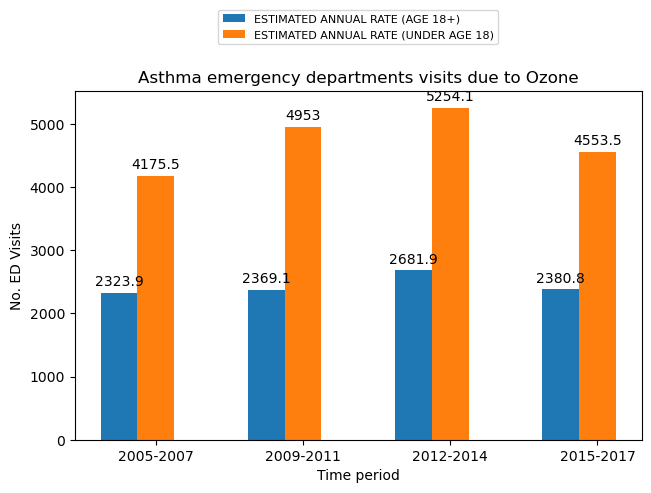

In [437]:
# Create a subplot that plots the two measures of asthma related ED visits
# In this plot we also annotated the values on the tops of each bar

x = np.arange(len(years))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in measure.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label = attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('No. ED Visits')
ax.set_xlabel('Time period')
ax.set_title('Asthma emergency departments visits due to Ozone')
ax.set_xticks(x + width, years)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol = 1, fontsize = 8)
#ax.set_ylim(0, 250)
plt.show()

### **Part 2:**

*Recreate the visualizations above using the Seaborn library as best as possible.*


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  

*In addition, please explain the properties you are showcasing.*


### **FIRST PLOT - SEABORN**

In [438]:
# Create a new df with upper west side filtered out 
# We need to create seperate columns for the season and year

air_quality_seasons_uws = air_quality_seasons.copy()
air_quality_seasons_uws = air_quality_seasons_uws[air_quality_seasons_uws ["GEO_PLACE_NAME"] == "UPPER WEST SIDE"]

In [439]:
# Sorted values so years were in ascending order

air_quality_seasons_uws = air_quality_seasons_uws.sort_values(["NAME", "YEAR"])

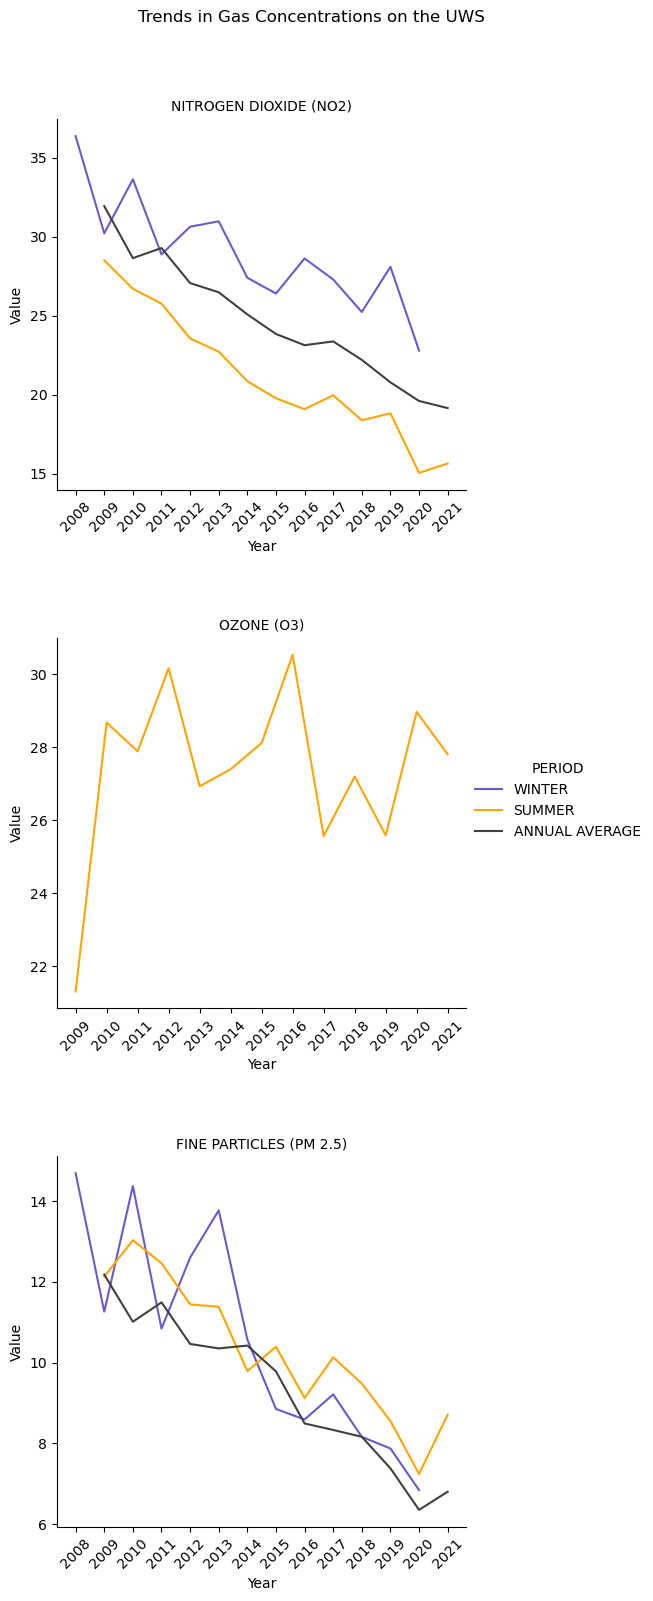

In [442]:
# Create a dicrtionary of the colors to represent the time periods 

hue_colors = {"WINTER": "#6a5acd",
             "SUMMER": "#ffa500",
             "ANNUAL AVERAGE": "#404040"}

# Create a list to order the plots 

r_order = ["NITROGEN DIOXIDE (NO2)", "OZONE (O3)", "FINE PARTICLES (PM 2.5)"]

# Used relplot to created subplots 

plot = sns.relplot(data=air_quality_seasons_uws, 
             x="YEAR", 
             y="DATA_VALUE", 
             hue="PERIOD",
             palette = hue_colors,
             row="NAME",
             row_order = r_order,
             kind = "line",
             height=5, 
             aspect=1,
             facet_kws=dict(sharey=False, sharex=False),      
             ci = False)

# Added a title and for the whole plot and added a title for each subplot

plot.fig.suptitle("Trends in Gas Concentrations on the UWS", y=1.05)
plot.set_titles("{row_name}")
plot.set(xlabel="Year", ylabel= "Value")

plot.set_xticklabels(rotation = 45)

# Adjusted space between the plots

plt.subplots_adjust(hspace=0.4)
plt.show()

### **SECOND PLOT - SEABORN**

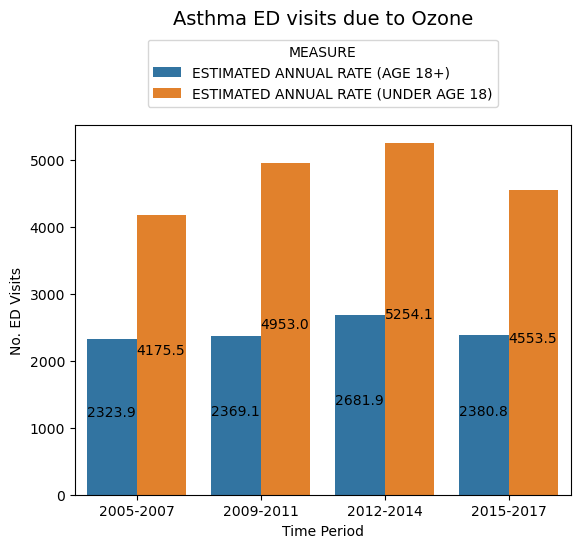

In [475]:
# Use .barplot and add hue to separate out the measures

asthma_plot = sns.barplot(data = asthamED_ozone, x = "TIME_PERIOD", y = "DATA_VALUE", hue = "MEASURE")
asthma_plot.set_title("Asthma ED visits due to Ozone", y = 1.25, fontsize = 14)
asthma_plot.set(xlabel="Time Period", ylabel= "No. ED Visits")
sns.move_legend(asthma_plot, "upper center", bbox_to_anchor=(0.5, 1.25))

# Add annotations  
locations = [-0.4, 0, 0.6, 1, 1.6, 2, 2.6, 3]

for i in range(len(asthamED_ozone["DATA_VALUE"])):
    asthma_plot.text(locations[i], asthamED_ozone["DATA_VALUE"][i]/2, str(asthamED_ozone["DATA_VALUE"][i]))
    horizontalalignment = "center"                
plt.show()

### **Part 3:**
*In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.*

The noticiple differences between plotting with Matplotlib and Seasborn is that Matplotlib took me many more lines of code to create the plots. Despite this, I did find there was more control over customizing the plots. In the plots I choose to create, usign seaborn to create the bar chart was much easier. I was able to use the parameter hue to differentiate the two different measures or groups. The Matplotlib code was from the documentation on the matplotlib website. I think that there might have been another way to generate the plot but I think I would have had to filter and create multiple dataframe objects. I am more familiar with subplots in Matplotlib and again it seems like it is earsier to control the layout and other aesthetics of the chart than using the relplot function in Seaborn. 

# Conclusions  

*After exploring your dataset, provide a short summary of what you noticed from this dataset.*

The data regarding the air qulity in New York City from Data.gov contained records of about 18 unique measurements that were either direct amounts of noxious gases/matter in the air, the effects these had on certain conditions (respiratory or cardiovascular), and measures related to the gas emissions. Out of the 144 unique neighborhoods, I decided to look at a few of these measurements for the Upper West Side neighborhood as it is my current residence. 

Looking at the trends in Ozone(O3), Nitrogen Dioxide (NO2), and Fine Particles found in the air on the Upper West Side we generally see a downward trend in both NO2 and Fine Particles from 2009 - 2021. During the Winter Season there are many more spikes, although the downward trend from year to year still exists. With regards to Ozone (O3), we only had data for the Summer season. In our data the lowest value was in 2009 (21.31) and values there after ranged between 25.59 - 30.54 ppb since then. The data set has information regarding effects of air quality on certain health condiditons. I decided to continue looking at Ozone (O3) and the effects on asthma. 

The bar chart created visualized the estimated anual rate of asthma ED visits due to Ozone (O3). The estimated numbar of visits were calculated in 2 year intervals from 2005 - 2017 (no data from 2008). The number of visits relatively remained relatively consistent across the intervals with the most visits between 2014-2017 estimated at 7,936 visits. It is clear from the bar chart that younger individuals under the age of 18 visit the ED more for Ozone related Asthma incidents. 

There are many other aspects of the data to visualize that would reveal insights into the trends in air quality and it's impact on New Yorkers. Moving beyond what was evaluated here, looking at how certain measures vary across New York might give important information on factors specific to regions or neighborhoods that may influence air quality.